In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,  LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
import catboost
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [7]:
# Load dataset
df = pd.read_csv("data.csv")

In [8]:
print(df.isnull().sum())

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64


In [9]:
df.head()

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53


In [10]:
df['Location'].unique()


array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'NLD', 'NZL',
       'POL', 'PRT', 'SVK', 'ESP', 'TUR', 'GBR', 'USA', 'EST', 'ISR',
       'RUS', 'SVN', 'ISL', 'LVA', 'LTU'], dtype=object)

In [11]:
df.dtypes

Location          object
Time               int64
Hospital_Stay    float64
MRI_Units        float64
CT_Scanners      float64
Hospital_Beds    float64
dtype: object

In [12]:
df.columns

Index(['Location', 'Time', 'Hospital_Stay', 'MRI_Units', 'CT_Scanners',
       'Hospital_Beds'],
      dtype='object')

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding categorical features
label_encoder = LabelEncoder()
# Apply label encoding to ordinal categorical features
df['Location'] = label_encoder.fit_transform(df['Location'])


df['Hospital_Stay'] = df['Hospital_Stay'].round().astype(int)
df['MRI_Units'] = df['MRI_Units'].round().astype(int)
df['CT_Scanners'] = df['CT_Scanners'].round().astype(int)
df['Hospital_Beds'] = df['Hospital_Beds'].round().astype(int)




# Display encoded DataFrame
print(df.head())

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


   Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0         0  1992              7          1           17              1
1         0  1994              6          2           18              2
2         0  1995              6          3           21              3
3         0  1996              6          3           22              3
4         0  1997              6          4           23              4


['label_encoder.pkl']

In [14]:
df.head(3)

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,0,1992,7,1,17,1
1,0,1994,6,2,18,2
2,0,1995,6,3,21,3


In [15]:
df.to_csv('encoded_data.csv', index=False)


In [16]:
df.dtypes

Location         int32
Time             int64
Hospital_Stay    int32
MRI_Units        int32
CT_Scanners      int32
Hospital_Beds    int32
dtype: object

In [17]:
corr = df.corr()
corr

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
Location,1.000000,0.143343,0.098661,-0.034717,-0.117474,-0.034717
Time,0.143343,1.000000,-0.359348,0.478956,0.274411,0.478956
Hospital_Stay,0.098661,-0.359348,1.000000,0.064690,0.247743,0.064690
MRI_Units,-0.034717,0.478956,0.064690,1.000000,0.760144,1.000000
CT_Scanners,-0.117474,0.274411,0.247743,0.760144,1.000000,0.760144
Hospital_Beds,-0.034717,0.478956,0.064690,1.000000,0.760144,1.000000


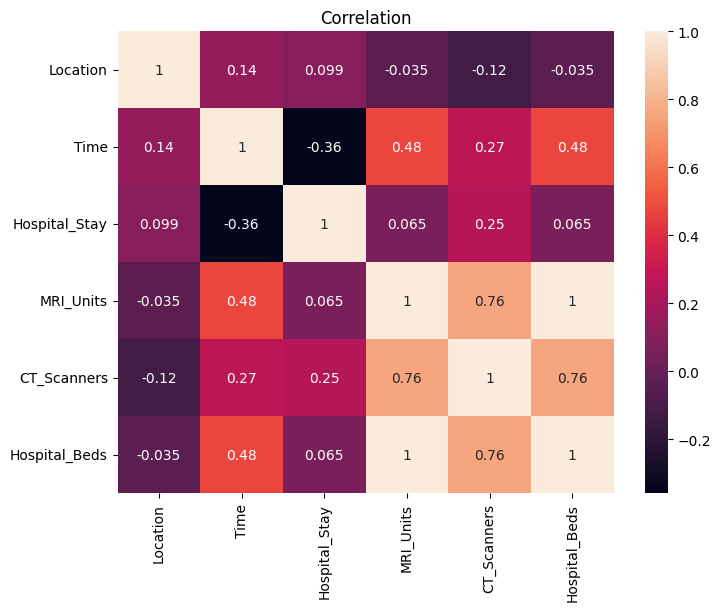

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example
plt.figure(figsize=(8, 6))  # Adjust width and height as needed
sns.heatmap(corr, annot=True)
plt.title('Correlation')
plt.show()


In [19]:
# Strip any leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

X = df.drop(columns=["Hospital_Stay"])  # All columns except target
y = df["Hospital_Stay"]  # Target column


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [21]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Linear Regression:
Mean Squared Error: 4.203404748324536
R^2 Score: 0.23132855515619977


In [23]:
from sklearn.svm import SVR
# Initialize and train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Support Vector Regressor (SVR):")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Support Vector Regressor (SVR):
Mean Squared Error: 3.1439790793405336
R^2 Score: 0.4250644213030751


In [24]:
from sklearn.tree import DecisionTreeRegressor
# Initialize and train Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Decision Tree Regressor:
Mean Squared Error: 0.3923076923076923
R^2 Score: 0.928259175900277


In [25]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize and train KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("K-Nearest Neighbors Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

K-Nearest Neighbors Regressor:
Mean Squared Error: 0.9301538461538463
R^2 Score: 0.8299039127423823


In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Ridge Regression:
Mean Squared Error: 4.199253456289071
R^2 Score: 0.23208769681348151


In [27]:
from sklearn.ensemble import AdaBoostRegressor
# Initialize and train AdaBoost Regressor model
base_model = DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(base_model, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ada_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("AdaBoost Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

AdaBoost Regressor:
Mean Squared Error: 1.5693880628629637
R^2 Score: 0.7130079395084825


In [28]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Initialize and train CatBoost Regressor model
catboost_model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', cat_features=[], verbose=0)
catboost_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = catboost_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("CatBoost Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


CatBoost Regressor:
Mean Squared Error: 0.445838809658308
R^2 Score: 0.9184700064574813


In [29]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05)
lgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LightGBM Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 5
[LightGBM] [Info] Start training from score 7.149485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Initialize and train ExtraTrees Regressor model
et_model = ExtraTreesRegressor(n_estimators=100)
et_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = et_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Extra Trees Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Extra Trees Regressor:
Mean Squared Error: 0.39976230769230764
R^2 Score: 0.9268959595740998


In [31]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize individual models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
catboost_model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', cat_features=[], verbose=0)

# Initialize Voting Regressor
voting_regressor = VotingRegressor(estimators=[
   
    ('dt', dt_model),
    ('rf', rf_model),
    ('et', et_model),
    ('catboost', catboost_model)
])

# Train the Voting Regressor
voting_regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = voting_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Voting Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Voting Regressor:
Mean Squared Error: 0.23427165556365478
R^2 Score: 0.9571590311306942


In [32]:
# Save the models
joblib.dump(catboost_model, 'catboost_model.pkl')
joblib.dump(et_model, 'et_model.pkl')
joblib.dump(voting_regressor, 'voting_model.pkl')

['voting_model.pkl']